In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.cluster import KMeans

In [37]:
data = pd.read_csv('Tabla_matlab.csv')

In [38]:
columnas = list(data.columns)
print("Columnas disponibles:", columnas)

Columnas disponibles: ['AS', 'Attr', 'BS', 'De', 'inter2', 'Cl2']


In [39]:
entrada = input("¿Con qué números quieres trabajar? (escoge dos, separados por una coma: ")
seleccionadas = [col.strip() for col in entrada.split(',')]

¿Con qué números quieres trabajar? (escoge dos, separados por una coma:  Attr,inter2


Convirtiendo columna 'Attr' de string binario a vectores de bits...
Añadiendo columna numérica 'inter2'...


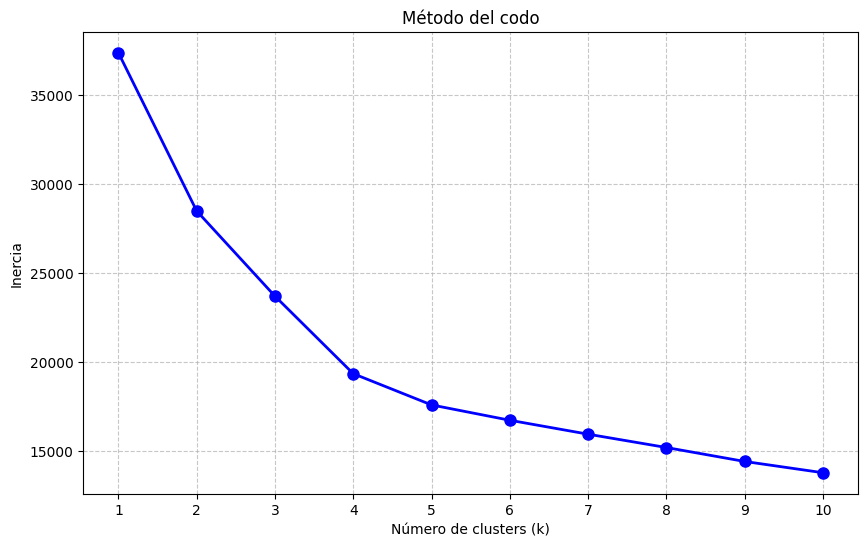

In [54]:
# Validación
if len(seleccionadas) != 2:
    raise ValueError("Debes seleccionar exactamente dos columnas.")

for col in seleccionadas:
    if col not in data.columns:
        raise ValueError(f"La columna '{col}' no existe en el DataFrame.")

# Construimos lista para almacenar las matrices de datos numéricos
columnas_transformadas = []

for col in seleccionadas:
    # Si la columna es tipo object y tiene strings que parecen binarios
    if data[col].dtype == 'object':
        # Verificamos que realmente contenga solo '0' y '1'
        if data[col].apply(lambda x: set(x) <= {'0', '1'}).all():
            print(f"Convirtiendo columna '{col}' de string binario a vectores de bits...")
            vectors = data[col].apply(lambda x: list(map(int, list(x))))
            matriz = np.vstack(vectors)
            columnas_transformadas.append(matriz)
        else:
            raise ValueError(f"La columna '{col}' es de tipo texto pero no parece contener strings binarios.")
    else:
        # Si es numérica, la añadimos directamente
        print(f"Añadiendo columna numérica '{col}'...")
        matriz = data[col].values.reshape(-1, 1)
        columnas_transformadas.append(matriz)

# Combinamos todas las matrices horizontalmente
X_combined = np.hstack(columnas_transformadas)

# Normalizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Método del codo
inercias = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42   )
    kmeans.fit(X_scaled)
    inercias.append(kmeans.inertia_)

# Graficamos
plt.figure(figsize=(10, 6))
plt.plot(K, inercias, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.xticks(K)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

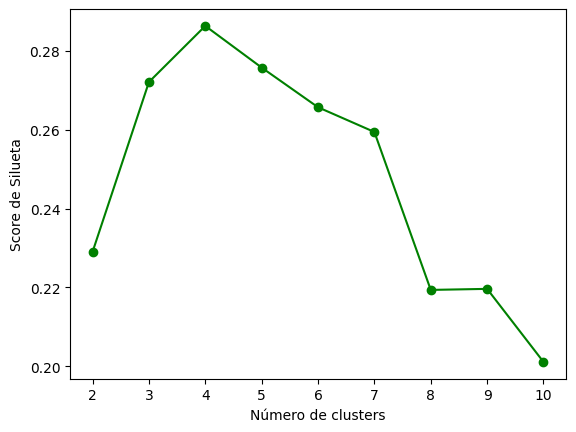

In [47]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, 'go-')
plt.xlabel('Número de clusters')
plt.ylabel('Score de Silueta')
plt.show()

In [88]:
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=4,          # más inicializaciones → más estabilidad
    max_iter=500,       # asegura convergencia
    tol=0.0001, verbose=0,
    init='k-means++',   # inicialización recomendada
    algorithm='elkan'   # puedes probar 'elkan'
                     )
labels = kmeans_final.fit_predict(X_scaled)

In [89]:
# Guardar resultados en DataFrame
data_clasificada = data.copy()
data_clasificada['Cluster'] = labels

# Guardar a CSV
data_clasificada.to_csv('Tabla_clasificada_ima.csv', index=False)

print("Clustering completado y resultados guardados en 'Tabla_clasificada_ima.csv'")

Clustering completado y resultados guardados en 'Tabla_clasificada_ima.csv'


In [90]:
conteo = data_clasificada['Cluster'].value_counts().sort_index()
print("Conteo de atractores por fenotipo:")
print(conteo)

Conteo de atractores por fenotipo:
Cluster
0    392
1    450
2    356
3    186
Name: count, dtype: int64
